In [1]:
import STEP1_create_biomes as step1
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

-----------------------------------------------------------------
Thanks for importing the STEP1_create_biomes.py script!
Usage:

import STEP1_create_biomes as step1
step1.run(som_epochnr, som_sigma, som_learning_rate, som_neighborhood_function, plt_show)

where som_epochnr is the number of total epochs,
som_sigma is the initial/maximum radius,
som_learning_rate is the learning rate,
som_neighborhood_function is one of "gaussian", "mexican_hat", "bubble" or "triangle" and
plt_show is a boolean flag for showing the plot instead of just returning data in format of [lon, lat, biomes].
-----------------------------------------------------------------




i=0, j=0
-----------------------------------------------------------------
SOM training started with 1000000 total epochs.
...
som_sigma=1.0, som_learning_rate=0.001, som_neighborhood_function='gaussian'
...
SOM training ended with a total time of 33.54548192024231 seconds.
-----------------------------------------------------------------


i=0, j=1
-----------------------------------------------------------------
SOM training started with 1000000 total epochs.
...
som_sigma=1.0, som_learning_rate=1.0, som_neighborhood_function='gaussian'
...
SOM training ended with a total time of 33.30799174308777 seconds.
-----------------------------------------------------------------


i=0, j=2
-----------------------------------------------------------------
SOM training started with 1000000 total epochs.
...
som_sigma=1.0, som_learning_rate=4.0, som_neighborhood_function='gaussian'
...
SOM training ended with a total time of 33.390464544296265 seconds.
----------------------------------------

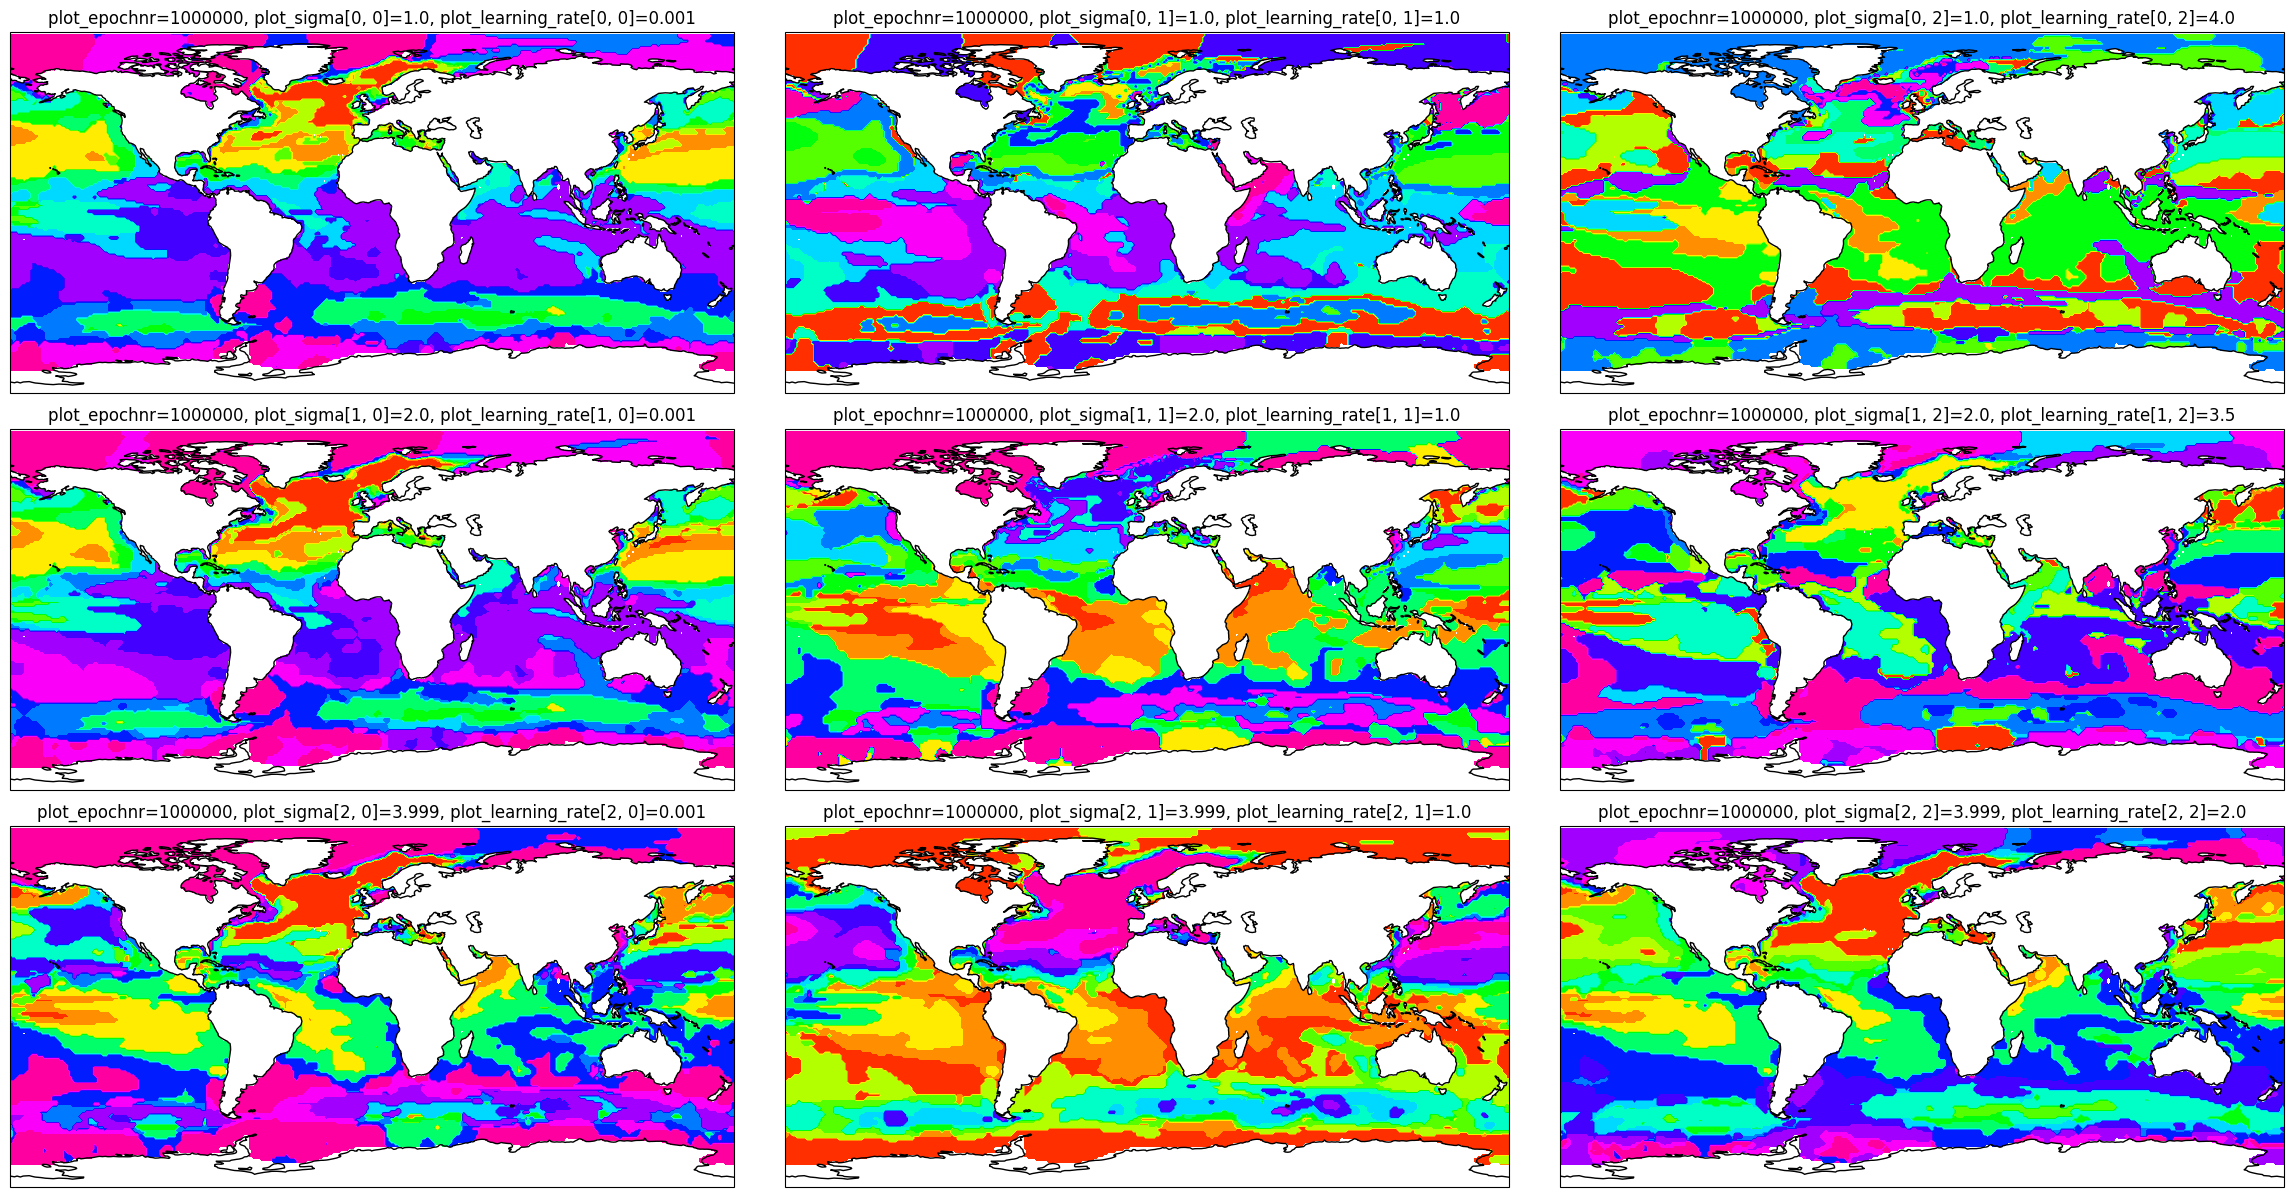

In [2]:
%%timeit -n1 -r1
gridlength = 3
gridheight = 3
fig, axs = plt.subplots(gridlength, gridheight, figsize=[30, 15], squeeze=False, gridspec_kw={'wspace': 0, 'hspace': 0.1}, subplot_kw={'projection': ccrs.PlateCarree()})
cmap = plt.colormaps['hsv'].with_extremes(under='white')

plot_epochnr = int(1e6)


plot_sigma = np.array([[1, 1, 1], [2, 2, 2], [3.999, 3.999, 3.999]])
plot_learning_rate = np.array([[0.001, 1, 4], [0.001, 1, 3.5], [0.001, 1, 2]])
for i in range(gridlength):
    for j in range(gridheight):
        print('\n')
        print(f'{i=}, {j=}')
        axs[i, j].contourf(*step1.run(plt_show=False, som_epochnr=plot_epochnr, som_sigma=plot_sigma[i, j], som_learning_rate=plot_learning_rate[i, j]), np.arange(0, 16.1, 1), cmap=cmap)
        axs[i, j].coastlines()
        axs[i, j].set_title(f'{plot_epochnr=}, plot_sigma[{i}, {j}]={plot_sigma[i, j]}, plot_learning_rate[{i}, {j}]={plot_learning_rate[i, j]}')

plt.savefig('plots_pdf/plot_comparisongrid.pdf')
plt.savefig('plots_png/plot_comparisongrid.png')